## An Introduction to Neural networks

Neural networks (NNs) and particularly a subset of neural networks (deep neural networks; DNNs) have become the poster child of modern AI due to its recent booming success in solving a multitude of complex problems, such as beating the world's GO champion, facilitating self-driving cars and much more. Here you will learn the basics of neural networks through interactive code in simple python (it's easier than it sounds!). This notebook introduces neural networks in general.

### So what is a neural network? 
We can try to answer that by considering the simplest NN possible: the <b>perceptron</b>, which strictly speaking only consists of a single neuron.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

#### The Perceptron
Borrowing language from neuroscience, we speak of artificial neurons and their synapses (more often referred to as <b>weights</b>). A perceptron is a single neuron, taking one or more inputs, and returning exactly one output (See Figure below). 

Just like biological neural networks, the perceptron integrates signals from incoming synapses (adding together the parts). If this sum reaches a given threshold (referred to as the bias), the neuron fires, otherwise it does nothing. We represent this output as 1 (fires) or 0 (doesn't fire). This all-or-nothing behaviour is facilitated in the <b>axon hillock</b> in the biological neuron, and is implemented as a step function <b>h(x)</b> in the artificial one.

Although the artificial neuron is a massive abstraction of the biological one, it has enough of the properties necessary to exhibit very interesting behaviour.

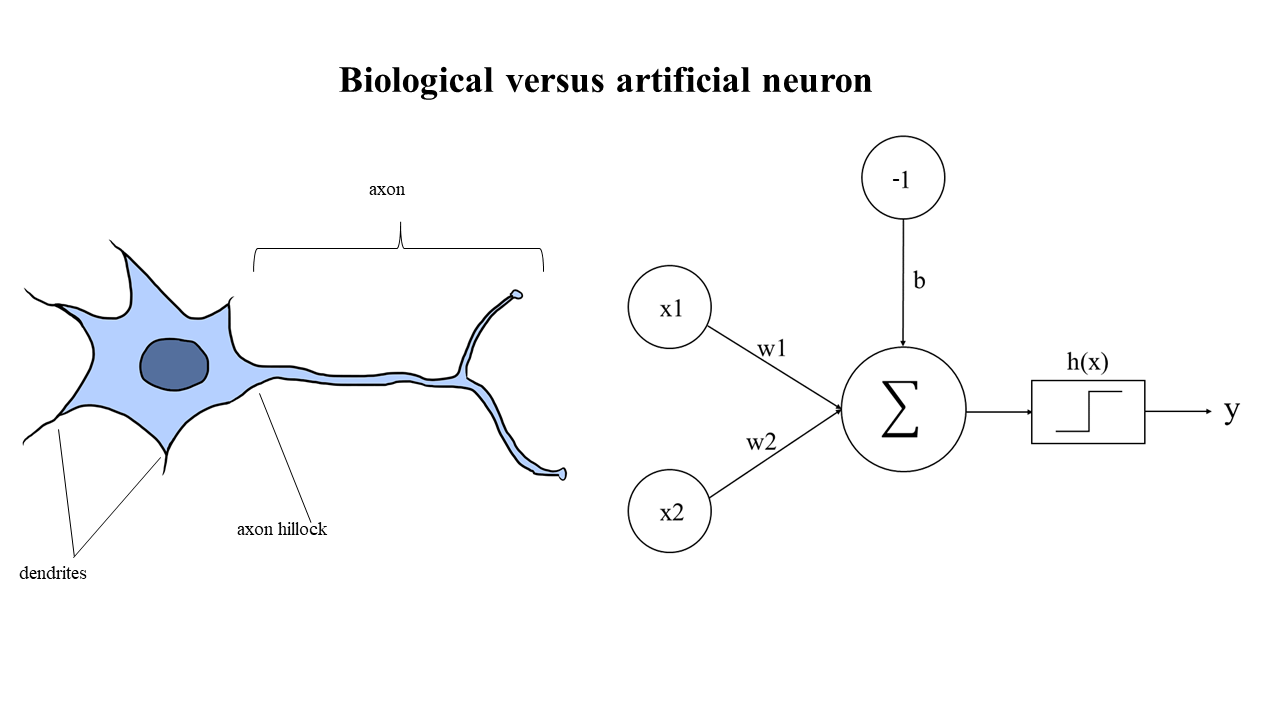

In [2]:
from IPython.display import Image
Image(filename='./assets/neuron_artificial_biological.png', width=800)

Formally, what the figure says is that the output of an artificial neuron is simply the sum of its inputs multiplied by their respective synapse weights (plus a bias)
        
$$ Z = x_1  w_1 +  x_2 w_2 + b = \sum_{i=1}^N(x_i w_i) + b$$ 

followed by an activation function

$$ h(X) =
    \begin{cases}
      1, & \text{if}\ X>0 \\
      0, & \text{if}\ X\leq0 \\
    \end{cases} $$

So in total we have

$$ y = h(Z) $$

<b>Remark:</b> adding the bias term is equivalent to setting an activation threshold to b instead of 0. 
        
So all the neuron does is to take some inputs, add them together, and deciding whether the inputs are strong enough to activate or not. To illustrate how simple this actually is, we will implement a minimalistic perceptron in Python!

#### Exercise 1. implement the activation function $h$, call it `activation`. It should take 2 arguments: `x` and `threshold`.

In [3]:
# %load solutions/ex1_1.py

def activation(x, threshold):
    if x >= threshold: return 1
    else: return 0

With that basis it is extremely trivial to build a perceptron which takes 2 inputs.

In [4]:
def perceptron(inputs, weights, b):
    """
    inputs  : The values in the input neurons (list)
    weights : The weights connecting n1 and n2 to the output neuron (list)
    b       : The threshold below which the postsynaptic neuron won't fire (number)
    """
    in1, in2 = inputs
    w1, w2 = weights
    s = in1*w1 + in2*w2
    return activation(s, b)

Simple right? Now, see if you can do the following: 
#### Exercise 2. Modify `perceptron` as to take 3 instead of 2 inputs.  b) Make the perceptron take an arbitrary number of inputs.


In [5]:
# %load solutions/ex1_2a.py

# this one takes exactly 3 inputs
def perceptron(inputs, weights, b):
    in1, in2 = inputs
    w1, w2 = weights
    s = in1*w1 + in2*w2
    return activation(s, b)

In [6]:
# %load solutions/ex1_2b.py

# this one takes arbitrary many inputs
def perceptron(inputs, weights, b):
    s = sum([i*w for i,w in zip(inputs, weights)])
    return activation(s, b)

So what's so special about this artificial neuron? Suppose we have the following dataset from a fishing trip, by recording the weight and length for cod and haddock. We represent the class as either a 1 (cod) or 0 (haddock).

In [7]:
import pandas as pd
df = pd.DataFrame({"Weight":[1.4, 1.6, 1.6, 2,  1.4,  1.35, 1.5,  1.7], 
                   "Length":[.6,  .4,  .7,  .6,  .5,   .35, .25, 0.7], 
                   "Class" :[0,    1,  0,  1,    0,     1,   1,   0]})
df

,Weight,Length,Class
0,1.40,0.60,0
1,1.60,0.40,1
2,1.60,0.70,0
3,2.00,0.60,1
4,1.40,0.50,0
5,1.35,0.35,1
6,1.50,0.25,1
7,1.70,0.70,0


<b>Pro tip</b>: Always visualize your data before running a machine learning model.

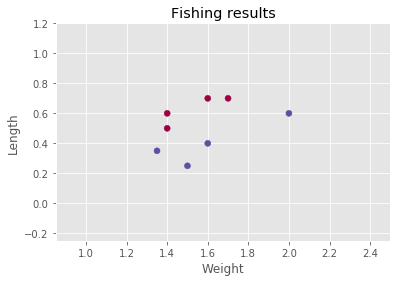

In [8]:
from matplotlib import pyplot as plt

# Define the figure boundaries
X = df.drop(labels=["Class"], axis=1).values
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Draw a scatter plot of the weight and length of the fishes
plt.scatter(x= df.Weight, y = df.Length, c = df.Class, cmap=plt.cm.Spectral)
plt.xlabel("Weight"); plt.ylabel("Length")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Fishing results")

plt.show()

Is it possible for our perceptron to learn the difference between the cod and the haddock? The function below lets you plot the predicted output of the perceptron over all (weight, length)-pairs. (You are not expected to understand how the plotting function is implemented!).

In [9]:
# Modified from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-download-auto-examples-neighbors-plot-classification-py

def plot_decision(clf, X, y, weights, b, h=0.01):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make a prediction for every (weight, length) pair
    Z = list(map(lambda x: clf(x, weights, b), np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [10]:
# We split the data into the features X and the target y
X = df.drop(["Class"], axis=1).values 
y = df.Class.values

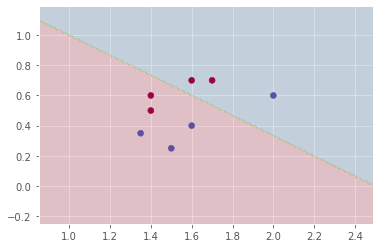

In [11]:
weights = [.4, .6]
b = 1

plot_decision(perceptron, X, y, weights=weights, b=b)

The transparent background is the perceptron's prediction. However, we selected our weights arbitrarily, so the above prediction is completely wrong. However, it should be possible to find a set of weights so that it will successfully seperate the red from the blue dots.

#### Exercise 3.Try to change the weights and the threshold b, and see how it affects the decision boundary. b) Change the parameters such that it properly separates the red and the blue dots.

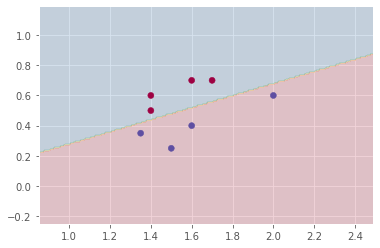

In [12]:
# %load solutions/ex1_3.py 

# one of many possible solutions

weights = [-2, 5]
b = -.6
plot_decision(perceptron, X, y, weights=weights, b=b)

Now, we obviously don't want to manually fiddle with the parameters, but we want the perceptron to learn its own weights by itself. How is this achieved? Well we need to update the weights based on the performance of the perceptron. The performance can be captured as the error:
#### Error = target value - predicted value = $ y - \hat y $

So if our prediction is lower then the target, we want our prediction to be higher. This is achieved by increasing the weight from the synapses in the case of a positive input and decreasing the weight if the input is negative. On the other hand, if the prediction is larger than the desired target, we do the opposite. This leads to the update rule:

#### $$ W \leftarrow W + \eta  (Y - \hat Y) X, $$
where $\eta$ is the learning rate - to control how much we want to change the weights in each iteration. Notice that we multiply by $X$ to correct for the sign (+ or -).

In [13]:
t = np.array([1,2])
a,b = t
b

2

In [14]:
X.shape

(8, 2)

In [76]:
def perceptron(inputs, weights, b):
    """
    inputs  : The values in the input neurons (list)
    weights : The weights connecting n1 and n2 to the output neuron (list)
    b       : The threshold below which the postsynaptic neuron won't fire (number)
    """
    in1, in2 = inputs
    w1, w2 = weights
    s = in1*w1 + in2*w2
    return activation(s, b)

def train(clf, X, y, weights, bias, learning_rate=0.1):
    """
    Performs stochastic gradient descent for one epoch.
    
    Parameters
    -----------------------------
    clf : the perceptron function
    X : input samples
    y : input target values
    weights : list of parameters
    bias : bias term
    learning_rate : learning rate
    
    Output
    -----------------------------
    w1 : the first weight after training 
    w2 : the second weight
    b : the bias 
    """
    b = bias
    w1, w2 = weights
    errors = []
    for i in range(len(y)):

        x_i = X[i,:]  # the i'th iteration
        target = y[i] # the i'th target
        pred = perceptron(x_i, [w1, w2], b)
        
        ## ADD YOUR CODE HERE
        error = target - pred
        
        errors.append(error)
        
        w1 +=  learning_rate * error * x_i[0]
        w2 +=  learning_rate * error * x_i[1]
        b -=  learning_rate * error
        
    print("total absolute error: ", np.abs(errors).sum()) 
    
    return w1, w2, b

#### The function `train` implements this update rule. However,something is missing. 

#### Exercise 4. Add the code necessary for it to work. (The [cell below](#another_cell) will throw an error message if the code in `train` is incorrect).




In [77]:
# %load solutions/ex1_4.py

# add this to the function:
# error = target - y_pred

In [78]:
[(xi,yi) for xi,yi in zip(X, y) ]

[(array([1.4, 0.6]), 0),
 (array([1.6, 0.4]), 1),
 (array([1.6, 0.7]), 0),
 (array([2. , 0.6]), 1),
 (array([1.4, 0.5]), 0),
 (array([1.35, 0.35]), 1),
 (array([1.5 , 0.25]), 1),
 (array([1.7, 0.7]), 0)]

In [79]:
train(perceptron, X, y, [w1, w2], b)

total absolute error:  0


(0.8249999999999988, -0.8849999999999989, 0.8)

In [80]:
for i in range(10):
    print('new epoch\n________')
    w1,w2,b = train(perceptron, X, y, [w1, w2], b)

new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0
new epoch
________
total absolute error:  0


#### Now we put it to the test

The code below calls `train` 60 times, each time looping through the whole training set <b>X</b>. At each iteration, the error is calculated and used to adjust the weights in the direction necessary to arrive at the right answer.

<a id='another_cell'></a>

total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  6
total absolute error:  6
total absolute error:  6
total absolute error:  6
total absolute error:  6
total absolute error:  6
total absolute error:  6
total absolute error:  4
total absolute error:  3
total absolute error:  2
total absolute error:  2
total absolute error:  4
total absolute error:  6
total absolute error:  6
total absolute error:  4
total absolute error:  2
total absolute error:  1
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0
total absolute error:  0


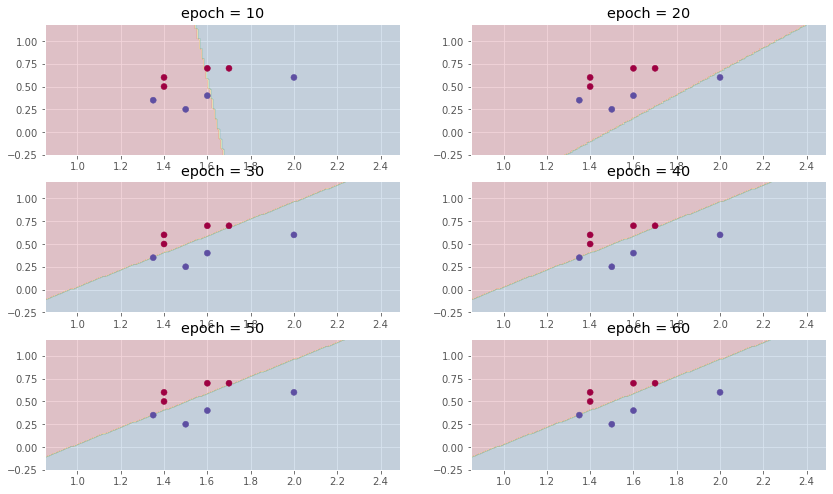

In [82]:
# initialize some random weights
w1, w2, b = .6, .1, 1

fig = plt.figure(figsize=(14,14))

epochs=60  # number of epochs
fr=10      # the number of epochs between plots 
j=0 


for i in range(epochs):

    # train a single epoch and update accordingly
    w1, w2, b = train(perceptron, X, y, [w1, w2], b) 
    
    if i%fr == 0: 
        j += 1
        fig.add_subplot(5, 2, j); 
        plt.title(f'epoch = {i+10}')
        plot_decision(perceptron, X, y, [w1, w2], b)

And voila: the perceptron successfully completes our classification task. 


In summary, we are looping through the whole sample 
Notice how the decision boundary converges as we keep training it, until it reaches a satisfactory result.

<br>
<b>Remark:</b> Perceptrons can take an arbitrary number of inputs, but in the higher dimensional case we will obtain a hyperplane (and not a line) separating the data. In three dimensions this corresponds to a regular plane. 

So just by updating the weights (synapses) of the network in a clever fashion, we can have it do some impressive things. In fact, the perceptron is guaranteed to converge as long as the data is linearly seperable! On the other hand, if the data is non-linear, the perceptron will no longer suffice.

The key to overcoming this problem is to add a hidden layer between the input layer and the output layer, making a multilayer perceptron. We will not implement this by ourselves, but use implementations found in other python libraries, such as `scikit-learn` or `tensorflow`.

#### Exercise 5. Rerun the code above but change the learning rate from 0.1 to 0.01. How does this affect the plots?

total absolute error:  4
total absolute error:  5
total absolute error:  4
total absolute error:  4
total absolute error:  5
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  5
total absolute error:  4
total absolute error:  4
total absolute error:  5
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  5
total absolute error:  4
total absolute error:  4
total absolute error:  5
total absolute error:  4
total absolute error:  4
total absolute error:  3
total absolute error:  4
total absolute error:  4
total absolute error:  3
total absolute error:  4
total absolute error:  4
total absolute error:  2
total absolute error:  3
total absolute error:  4
total absolute error:  4
total absolute error:  2
total absolute error:  3
total absolute error:  4
total absolute error:  2
total absolute error:  2
total absolute error:  2
total absolute error:  3
total absolute error:  4
total absolute error:  2


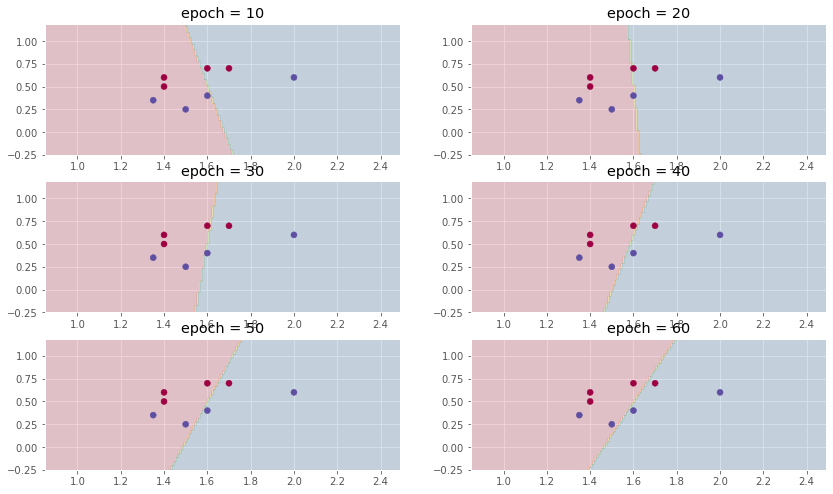

In [84]:
# %load solutions/ex1_5.py

# initialize some random weights
w1, w2, b = .6, .1, 1

fig = plt.figure(figsize=(14,14))

epochs=60  # number of epochs
fr=10      # the number of epochs between plots 
j=0 


for i in range(epochs):

    # train a single epoch and update accordingly
    w1, w2, b = train(perceptron, X, y, [w1, w2], b, learning_rate=0.01) 
    
    if i%fr == 0: 
        j += 1
        fig.add_subplot(5, 2, j); 
        plt.title(f'epoch = {i+10}')
        plot_decision(perceptron, X, y, [w1, w2], b)

#### Exercise 6. Try to apply the perceptron on a non-linear dataset (provided below). Explain what you see.

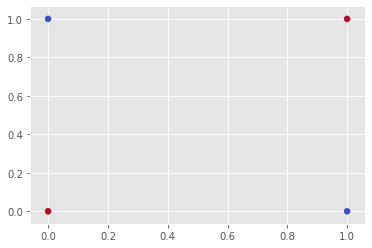

In [86]:
X = np.array([[0,0],
             [0,1],
             [1,0], 
             [1,1]])

y = np.array([1, 0, 0, 1])

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm); plt.show()

total absolute error:  2
total absolute error:  1
total absolute error:  2
total absolute error:  1
total absolute error:  2
total absolute error:  1
total absolute error:  2
total absolute error:  1
total absolute error:  2
total absolute error:  1
total absolute error:  2
total absolute error:  1
total absolute error:  2
total absolute error:  3
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4
total absolute error:  4


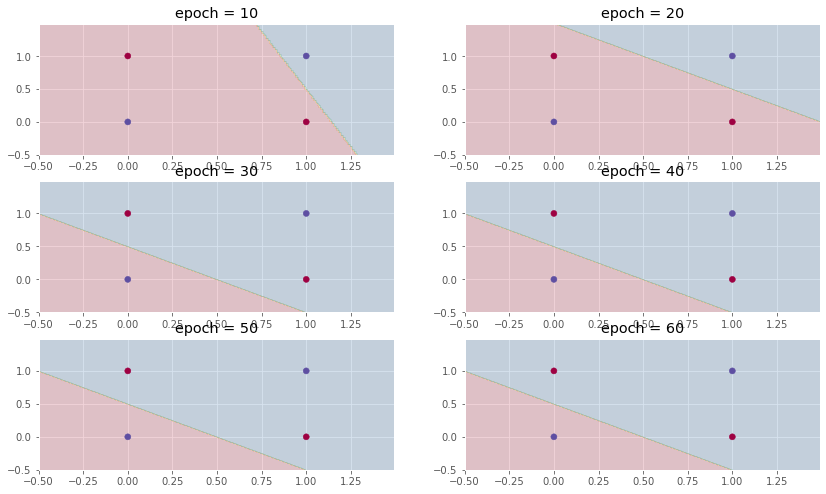

In [87]:
# %load solutions/ex1_6.py

# initialize some random weights
w1, w2, b = .6, .1, 1

fig = plt.figure(figsize=(14,14))

epochs=60  # number of epochs
fr=10      # the number of epochs between plots 
j=0 


for i in range(epochs):

    # train a single epoch and update accordingly
    w1, w2, b = train(perceptron, X, y, [w1, w2], b) 
    
    if i%fr == 0: 
        j += 1
        fig.add_subplot(5, 2, j); 
        plt.title(f'epoch = {i+10}')
        plot_decision(perceptron, X, y, [w1, w2], b)

# Overcoming linearity (unfinished)

Luckily this caveat is easily overcome by stacking multiple layers after one another. For this to work properly though, we need a non-linear activation function. The most widely used is the ReLU, which is simply keeps the positive values and discounts the negative ones (returns 0 instead).

#### Exercise 7: implement ReLU (i.e. write a function which takes a number and returns the number if it is positive and 0 if it is negative)

In [115]:
# %load solutions/ex1_7.py

def relu(x):
    return max([x,0])

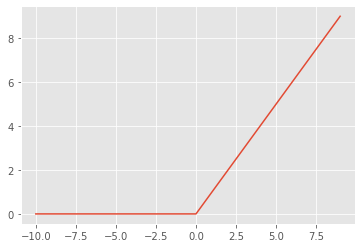

In [106]:
# plot relu here
xs = range(-10, 10)
ys = [relu(x) for x in range(-10,10)]
plt.plot(xs, ys)


Inputs-to a model can be represented as a vector (essentially a list) of features. The weights in the neural network also has a natural structural representation: the matrix (or equivalently a table). The output of a layer is just the dot product of the input and weights:

$y = Wx$

In [107]:
W = np.arange(12).reshape(4,3)
x = np.array([1,2,3]) 

In [108]:
print("weights:\n", W); print("\ninput: ", x)

weights:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

input:  [1 2 3]


* The dot product is performed by element-wise multiplication of x broadcasted over each row.
* for this to work, the dimensions of W and x have to match
* [See here for some easy examples](https://www.mathsisfun.com/algebra/matrix-multiplying.html)


In [109]:
# the first element corresponds to 0*8 + 1*2 + 2*3 = 2+6 = 8
np.dot(W,x)

array([ 8, 26, 44, 62])

### Gradient descent

For multilayered neural networks, the update rule is slightly more complicated, but still undertandable knowing only high school maths. Like above we have to find out whether a given weight should increase or decrease. This is essentially the derivative of the error function with respect to that weight. The complete matrix of derivatives is called the **gradient**. Reducing the error function gradually by applying a suitable update rule is called **gradient descent**. Our goal is to land in a valley, a place of low error.

![title](assets/cost_func_2d_gradient.png)

To understand how we get the gradient, consider the following. The output of a neural network can be thought of a composition of functions, where the output of one layer is passed as input to the next: 
    $$
    y = mse(l2(l1(x)))
    $$
The derivative of the weight w in l1 (layer 1) is then $dy/dw$, which can be found using the chain rule: $dy/dw = dy/dl2 dl2/w$

In [110]:
def mse(y, y_hat):
    return .5*(y-y_hat)**2

In [111]:
def linear(x, w, b):
    return w@x - b

In [112]:
# has to be modified for arrays
def relu(x):
    return x*(x>0)

In [113]:
# the function composition of a two-layer network would look something like this:
l1 = relu(linear(x), w1, b1)
l2 = relu(linear(l1), w2, b2)
l2

TypeError: linear() missing 2 required positional arguments: 'w' and 'b'

In [114]:
# or equivalently but less readable
linear(relu(linear(x, w1, b1)), w2, b2)

NameError: name 'b1' is not defined

#### Ex.8: provided the mathematical expressions, try to turn them into code in the functions below: 

In [238]:
# what is the derivative of 0.5*x^2?
def mse_gradient(y, y_hat):
    return y-y_hat

In [239]:
# Hint:
# we have three derivatives of interest: for the weights themselves, for the bias and for the input.
# y = Wx - b
# dy/dW = x
# dy/db = -1
# dy/dx = w

def linear_gradient(x, w, b):
    w_grad = x
    b_grad = np.ones(w.shape[0])
    i_grad = w
    return w_grad, b_grad, i_grad

In [240]:
# Hint:
# the gradient for relu is 1 for positive inputs and 0 for non-positive inputs. 
# This is best expressed as a boolean array.

def relu_gradient(x):
    return (x > 0).astype(int)

In [241]:
#n_units = [10, 8, 8, 2]
#
#matrix_shapes = [(n_units[p], n_units[p+1]) for p in range(len(n_units)-1)]
#
#all_Ws = [np.random.rand(*shape) for shape in matrix_shapes]

Below is a functioning example of a slightly more flexible neural network, which allows you to vary the number of input, hidden and output units. However, this is restricted to a single hidden layer and a particular activation function (relu). There exist great high-level APIs such as Keras and pytorch which have built-in functionalities to let you seamlessly build your own networks. (Also it looks more complicated than it really is).

In [400]:
class SimpleNeuralNetwork():
    
    def __init__(self, n_in, n_hidden, n_out, lr=0.01):
        #parameters
        self.W1 = np.random.rand(n_hidden, n_in)
        self.W2 = np.random.rand(n_out, n_hidden)
        self.b1 = np.random.rand(n_hidden)
        self.b2 = np.random.rand(n_out)
        self.lr = lr
        
        for param in [self.W1, self.W2]: print(repr(param));print(param.shape)
        
    
    def forward(self, x, y, update=False):
        #forward
        lin1 = linear(x, self.W1, self.b1)
        l1 = relu(lin1)
        l2 = linear(l1, self.W2, self.b2)
        for a in [lin1, l1, l2]: print(a)
        
        if not update: return l2
        # compute gradients -- backward
        derr_dl2 = mse_gradient(y, l2)
        dl2_dw2, dl2_db2, dl2_dl1 = linear_gradient(l1, self.W2, self.b2)
        dl1_dlin1 = relu_gradient(lin1)
        dlin1_dw1, dlin_1db1, _ = linear_gradient(x, self.W1, self.b1)
        print(dlin1_dw1.shape); print(dl1_dlin1.shape); print('!')
     
        # apply gradient descent using the chain rule
        for p in [derr_dl2, dl2_dw2, self.W2]: print(p.shape)        
        
        dw2 = dl2_dw2 @ derr_dl2
        
        self.W2 -= self.lr * np.outer(derr_dl2.T, dl2_dw2)
        self.b2 -= self.lr * dl2_db2 * derr_dl2
       # self.W1 -= self.lr * np.outer(derr_dl2, dl2_dw2) * dl1_dlin1 * dlin1_dw1
       # self.W1 -= self.lr *  derrdl2 * dl2dl1 * np.dot(dl1dlin1.T, dlin1dw1) 
       # self.b1 -= self.lr * dlin1db1 * dl1dlin1 * dl2dl1  * derrdl2
        
        return l2
    
    def train(self, data, labels):
        for x,y in zip(data, labels):
            y_hat = self.forward(x, y, update=True)
            print('-------')
            print(y); print(y_hat)
            error = mse(y, y_hat)
            print("error: ", error)   
                

In [421]:
testX = np.random.rand(10, 4)*20
testy = np.random.rand(10, 2)*3

print(testX[0].shape); print(testy[0].shape)

(4,)
(2,)


In [422]:
layers = [testX[0].shape[0], 3, testy[0].shape[0]] # in, hidden, out

In [423]:
nn = SimpleNeuralNetwork(*layers)

array([[0.1186639 , 0.60565398, 0.59695474, 0.18853381],
       [0.51476916, 0.64017495, 0.3507819 , 0.71952616],
       [0.26881942, 0.85797983, 0.36599872, 0.78248228]])
(3, 4)
array([[0.85498205, 0.82750721, 0.61579955],
       [0.84578474, 0.05026335, 0.4564234 ]])
(2, 3)


In [424]:
#nn.forward(testX[1], testy[1])

In [425]:
a = np.array([[1,2,5,6]])
b = np.array([[1,2,3]])
print(a.shape, b.shape)
a.T @ b == np.outer(a, b)

(1, 4) (1, 3)


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [426]:
a.T@a

array([[ 1,  2,  5,  6],
       [ 2,  4, 10, 12],
       [ 5, 10, 25, 30],
       [ 6, 12, 30, 36]])

In [427]:
t = np.arange(4)
t.reshape(-1,1).shape

(4, 1)

In [428]:
nn.train(testX, testy)

[17.33995962 31.45644621 31.64481441]
[17.33995962 31.45644621 31.64481441]
[60.18093485 30.4275374 ]
(4,)
(3,)
!
(2,)
(3,)
(2, 3)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [361]:
nn.train(testX, testy)

[29.29940678 18.94078191  6.68877079]
[29.29940678 18.94078191  6.68877079]
[1.26920319e+09 1.27548162e+09]
(4,)
(3,)
!
(2,)
(3,)
(2, 3)
-------
[1.5269043  2.91012305]
[1.26920319e+09 1.27548162e+09]
error:  [8.05438371e+17 8.13426676e+17]
[11.77965737 12.11240072  2.40447303]
[11.77965737 12.11240072  2.40447303]
[-6.88751075e+09 -6.92158150e+09]
(4,)
(3,)
!
(2,)
(3,)
(2, 3)
-------
[1.03611907 0.95976287]
[-6.88751075e+09 -6.92158150e+09]
error:  [2.37189021e+19 2.39541453e+19]
[14.67769701 12.47089505  1.78920793]
[14.67769701 12.47089505  1.78920793]
[1.46271292e+10 1.46994859e+10]
(4,)
(3,)
!
(2,)
(3,)
(2, 3)
-------
[1.68443375 2.42380303]
[1.46271292e+10 1.46994859e+10]
error:  [1.06976455e+20 1.08037443e+20]
[25.58773211 18.46388355  4.55444599]
[25.58773211 18.46388355  4.55444599]
[-6.60034721e+10 -6.63299744e+10]
(4,)
(3,)
!
(2,)
(3,)
(2, 3)
-------
[2.48861313 0.5374498 ]
[-6.60034721e+10 -6.63299744e+10]
error:  [2.17822917e+21 2.19983275e+21]
[13.71245702 14.38064138  3.